### Process of Machine Learning Predictions
### Housing Data Set

* Understand the problem
* Hypothesis Generation
* Get Data
* Data Exploration
* Data Pre-Processing
* Feature Engineering - Create 331 new features
* Model Training - XGBoost, Neural Network, Lasso
* Model Evaluation

#### Data Exploration
It helps us understand the nature of variables (skewed, missing, zero variance feature) so that they can be treated properly. It involves creating charts, graphs (univariate and bivariate analysis), and cross-tables to understand the behavior of features. 

#### Data Preprocessing
Here, we impute missing values and clean string variables (remove space, irregular tabs, data time format) and anything that shouldn't be there. This step is usually followed along with the data exploration stage. 

#### Feature Engineering
Now, we create and add new features to the data set. Most of the ideas for these features come during the hypothesis generation stage. 

In [1]:
#Loading libraries 
import numpy as np 
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

### Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

### Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

### Submission File Format
The file should contain a header and have the following format:

Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.

In [2]:
#loading data
train = pd.read_csv("data/train.csv", sep=',')
test = pd.read_csv("data/test.csv", sep=',')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The train data has 1460 rows and 81 columns
----------------------------
The test data has 1459 rows and 80 columns


In [5]:
#check missing values
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [6]:
#missing value percentage in each of these columns
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0] * 100
miss.sort_values(inplace=True)
miss

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

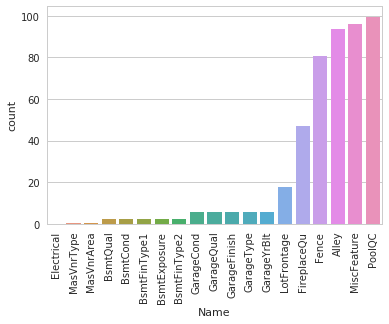

In [7]:
#visualising missing values
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
plt.show()

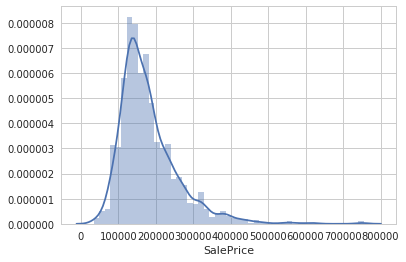

In [8]:
# Let's proceed and check the distribution of the target variable -- SalePrice
sns.distplot(train['SalePrice'])

We see that the target variable SalePrice has a right-skewed distribution. We'll need to <strong>log transform </strong>this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. In addition, <u>linear algorithms assume constant variance in the error term. </u>Alternatively, we can also confirm this skewed behavior using the skewness metric.

In [9]:
#skewness
print("The skewness of SalePrice is {}".format(train['SalePrice'].skew()))

The skewness of SalePrice is 1.8828757597682129


Skewness is 0.12133506220520406


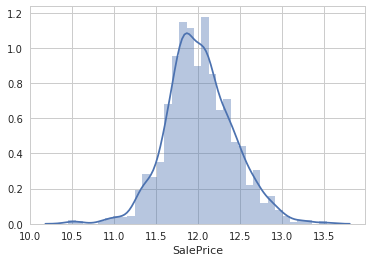

In [10]:
#now transforming the target variable
target = np.log(train['SalePrice'])
print ('Skewness is', target.skew())
sns.distplot(target)

In [11]:
#skewness
print("The skewness of SalePrice is {}".format(target.skew()))

The skewness of SalePrice is 0.12133506220520406


Since we have 80 variables, visualizing one by one wouldn't be an astute approach. Instead, we'll look at some variables based on their correlation with the target variable. However, there's a way to plot all variables at once, and we'll look at it as well. Moving forward, we'll separate numeric and categorical variables and explore this data from a different angle.

In [12]:
#separate variables into new data frames
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 38 numeric and 43 categorical columns in train data


In [13]:
del numeric_data['Id']

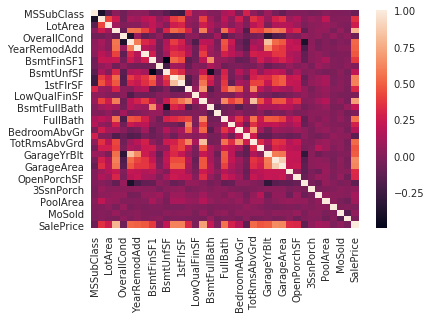

In [14]:
# correlation plot
# remove these correlated variables as they won't provide any extra useful information to the model.
corr = numeric_data.corr()
sns.heatmap(corr)

Notice the last row of this map. We can see the correlation of all variables against SalePrice. As you can see, some variables seem to be strongly correlated with the target variable. 

In [15]:
print (corr['SalePrice'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['SalePrice'].sort_values(ascending=False)[-5:]) #last 5 values`

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 

----------------------
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [16]:
train['OverallQual'].unique()
# 10 category variable

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

Check the median sale price of houses with respect to OverallQual. You might be wondering, “Why median ?” We are using median because the target variable is skewed. A skewed variable has outliers and median is robust to outliers.

In [17]:
#let's check the mean price per quality and plot it.
pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
#let's check the mean price per quality and plot it.
pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


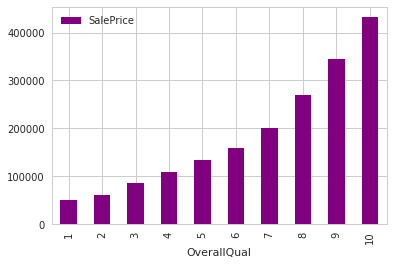

In [18]:
pivot.plot(kind='bar', color='purple')

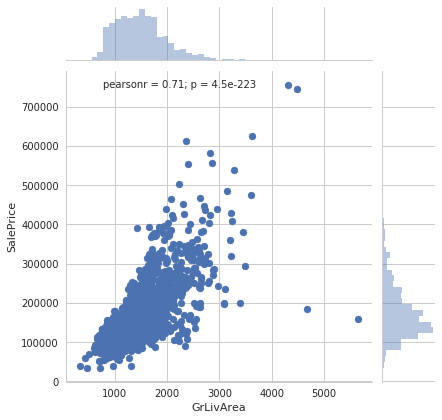

In [19]:
# This behavior is quite normal. As the overall quality of a house increases, its sale price also increases. 
# Let's visualize the next correlated variable GrLivArea and understand their behavior.
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'])

In [20]:
cat_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [21]:
sp_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
sp_pivot

,SalePrice
SaleCondition,
Abnorml,130000
AdjLand,104000
Alloca,148145
Family,140500
Normal,160000
Partial,244600


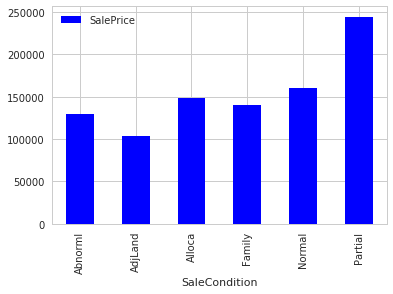

In [22]:
sp_pivot.plot(kind='bar',color='blue')

We see that SaleCondition Partial has the highest mean sale price. Though, due to lack of information<u> we can't generate many insights from this data. </u> Moving forward, like we used correlation to determine the influence of numeric features on SalePrice. Similarly, we'll use the ANOVA test to understand the correlation between categorical variables and SalePrice. 

<strong>ANOVA test </strong>is a statistical technique used to determine if there exists a significant difference in the mean of groups. For example, let's say we have two variables A and B. Each of these variables has 3 levels (a1,a2,a3 and b1,b2,b3). If the mean of these levels with respect to the target variable is the same, the ANOVA test will capture this behavior and we can safely remove them.

#### While using ANOVA, our hypothesis is as follows:

* Ho - There exists no significant difference between the groups. 
* Ha - There exists a significant difference between the groups.

Now, we'll define a function which calculates p values. From those p values, we'll calculate a disparity score. Higher the disparity score, better the feature in predicting sale price.

In [23]:
# ANOVA test for categorical variables. 
cat = [f for f in train.columns if train.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
       samples = []
       for cls in frame[c].unique():
              s = frame[frame[c] == cls]['SalePrice'].values
              samples.append(s)
       pval = stats.f_oneway(*samples)[1]
       pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

* stats.f_oneway; performs a 1-way ANOVA.
* <u>The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. </u>
*  The test is applied to samples from two or more groups, possibly with differing sizes.
* Disparity = np.log(1./cat_data['p_value'].values)

/home/fractaluser/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/fractaluser/anaconda/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:2916: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))


<module 'matplotlib.pyplot' from '/home/fractaluser/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py'>

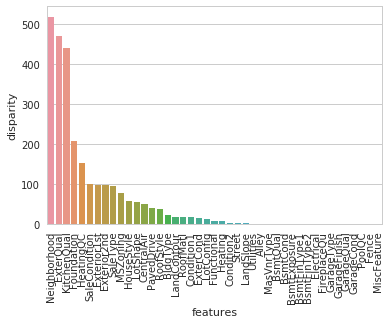

In [24]:
cat_data['SalePrice'] = train.SalePrice.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt 

Here we see that among all categorical variables <u>Neighborhoodturned out to be the most important feature followed by ExterQual, KitchenQual, etc.</u> It means that people also consider the goodness of the neighborhood, the quality of the kitchen, the quality of the material used on the exterior walls, etc. Finally, to get a quick glimpse of all variables in a data set.
* Plot histograms for all numeric variables to determine if all variables are skewed.
* For categorical variables, we'll create a boxplot and understand their nature.

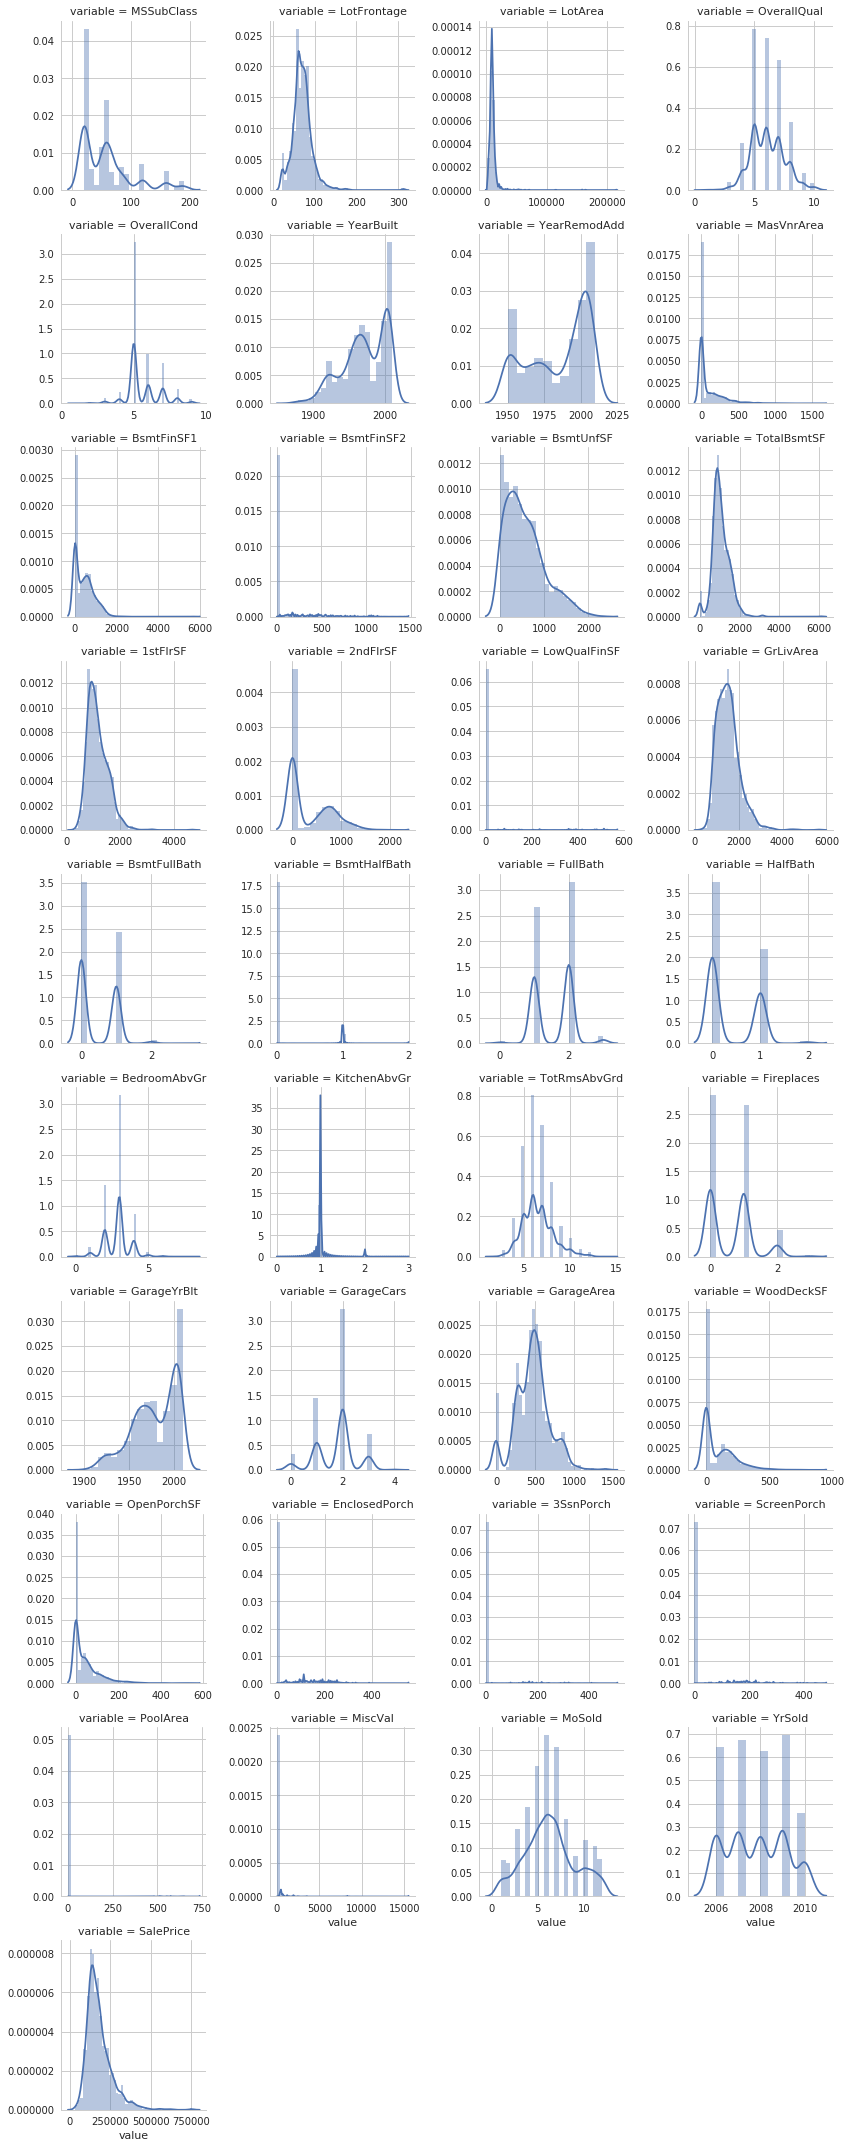

In [25]:
#create numeric plots
num = [f for f in train.columns if train.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

* Most of the variables are right skewed. We'll have to transform them in the next stage. 

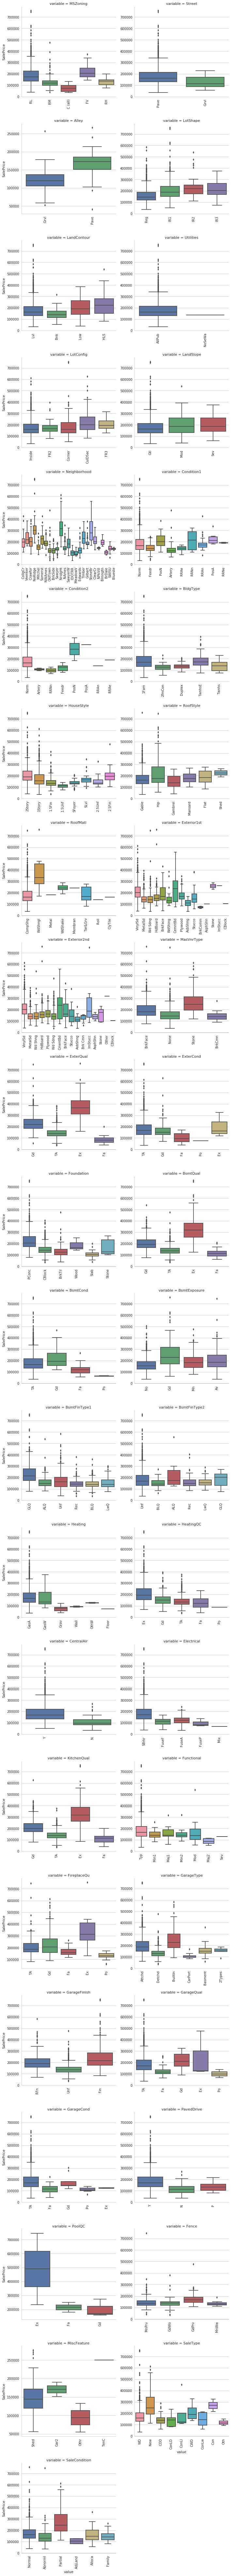

In [26]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in train.columns if train.dtypes[f] == 'object']

p = pd.melt(train, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

* We can see that most of the variables possess outlier values. 
* It would take us days if we start treating these outlier values one by one. 
* Hence, for now we'll leave them as is and let our algorithm deal with them. 
* As we know, <u>tree-based algorithms are usually robust to outliers. </u>

## Data Pre-Processing

In this stage, we'll <strong> deal with outlier values, encode variables, impute missing values, and take every possible initiative which can remove inconsistencies from the data set. </strong>If you remember, we discovered that the variable GrLivArea has outlier values. Precisely, one point crossed the 4000 mark. Let's remove that:


In [27]:
#removing outliers
train.drop(train[train['GrLivArea'] > 4000].index, inplace=True)
train.shape #removed 4 rows`

(1456, 81)

In row 666, in the <strong>test data, it was found that information in variables related to 'Garage'</strong> (GarageQual, GarageCond, GarageFinish, GarageYrBlt) is missing. Let's impute them using the mode of these respective variables.

### doubt

In [28]:
# Mask the nan values by using ~isnull():
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder()
# mask = ~test['GarageCond'].isnull()
# test['GarageCond'][mask] = enc.fit(test['GarageCond'][mask])
# stats.mode(test['GarageCond'])

In [29]:
#imputing using mode
test.loc[666, 'GarageQual'] = "TA" #stats.mode(test['GarageQual'])
test.loc[666, 'GarageCond'] = "TA" #stats.mode(test['GarageCond'])
test.loc[666, 'GarageFinish'] = "Unf" #stats.mode(test['GarageFinish'])
test.loc[666, 'GarageYrBlt'] = "1980" #np.nanmedian(test['GarageYrBlt'])`

In [30]:
# In row 1116, in test data, all garage variables are NA except GarageType. Let's mark it NA as well.
#mark as missing
test.loc[1116, 'GarageType'] = np.nan

Now, we'll <strong>encode all the categorical variables.</strong> 
* Most ML algorithms do not accept categorical values, instead they are expected to be converted to numerical. 
* <u>LabelEncoder</u> function from sklearn is used to encode variables. 

In [31]:
#importing function
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def factorize(data, var, fill_na = None):
    if fill_na is not None:
        data[var].fillna(fill_na, inplace=True)
    le.fit(data[var])
    data[var] = le.transform(data[var])
    return data

This <strong>function imputes the blank levels with mode values. </strong>
* The mode values are to be entered manually. 
* Impute the missing values in LotFrontage variable using the median value of <u>LotFrontage by Neighborhood. </u>

Such imputation strategies are built during data exploration. I suggest you spend some more time on <u>data exploration. To do this, we should combine our train and test data so that we can modify both the data sets at once.</u>

In [32]:
#combine the data set
alldata = train.append(test)
alldata.shape
(2915, 81)

(2915, 81)

In [33]:
#impute lotfrontage by median of neighborhood
lot_frontage_by_neighborhood = train['LotFrontage'].groupby(train['Neighborhood'])

for key, group in lot_frontage_by_neighborhood:
                idx = (alldata['Neighborhood'] == key) & (alldata['LotFrontage'].isnull())
                alldata.loc[idx, 'LotFrontage'] = group.median()

In [34]:
#imputing missing values as zero for other numerical varibales
alldata["MasVnrArea"].fillna(0, inplace=True)
alldata["BsmtFinSF1"].fillna(0, inplace=True)
alldata["BsmtFinSF2"].fillna(0, inplace=True)
alldata["BsmtUnfSF"].fillna(0, inplace=True)
alldata["TotalBsmtSF"].fillna(0, inplace=True)
alldata["GarageArea"].fillna(0, inplace=True)
alldata["BsmtFullBath"].fillna(0, inplace=True)
alldata["BsmtHalfBath"].fillna(0, inplace=True)
alldata["GarageCars"].fillna(0, inplace=True)
alldata["GarageYrBlt"].fillna(0.0, inplace=True)
alldata["PoolArea"].fillna(0, inplace=True)

Now, we'll convert the <strong>categorical variables into ordinal variables.</strong> 
* We'll simply create a dictionary of key-value pairs and map it to the variable in the data set.
* pandas.factorize() -- Encode the object as an enumerated type or categorical variable.

In [35]:
# Key-Value pairs mapping for categorical variable
qual_dict = {np.nan: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
name = np.array(['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond'])

for i in name:
     alldata[i] = alldata[i].map(qual_dict).astype(int)

alldata["BsmtExposure"] = alldata["BsmtExposure"].map({np.nan: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

bsmt_fin_dict = {np.nan: 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
alldata["BsmtFinType1"] = alldata["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
alldata["BsmtFinType2"] = alldata["BsmtFinType2"].map(bsmt_fin_dict).astype(int)
alldata["Functional"] = alldata["Functional"].map({np.nan: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

alldata["GarageFinish"] = alldata["GarageFinish"].map({np.nan: 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype(int)
alldata["Fence"] = alldata["Fence"].map({np.nan: 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype(int)

#encoding data
alldata["CentralAir"] = (alldata["CentralAir"] == "Y") * 1.0
varst = np.array(['MSSubClass','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Foundation','SaleCondition'])

for x in varst:
         factorize(alldata, x)

#encode variables and impute missing values
alldata = factorize(alldata, "MSZoning", "RL")
alldata = factorize(alldata, "Exterior1st", "Other")
alldata = factorize(alldata, "Exterior2nd", "Other")
alldata = factorize(alldata, "MasVnrType", "None")
alldata = factorize(alldata, "SaleType", "Oth")


## Feature Engineering
Feature engineering requires domain knowledge and lots of creative ideas. The <u>ideas for new features usually develop during the data exploration and hypothesis generation stages.</u> 

* <u>Most categorical variables have near-zero variance distribution. </u>
* Near-zero variance distribution is when one of the categories in a variable has >90% of the values. 
* We'll create some <u>binary variables depicting </u>the presence or absence of a category. 

In [36]:
# creating new variable (1 or 0) based on irregular count levels
# The level with highest count is kept as 1 and rest as 0
alldata["IsRegularLotShape"] = (alldata["LotShape"] == "Reg") * 1
alldata["IsLandLevel"] = (alldata["LandContour"] == "Lvl") * 1
alldata["IsLandSlopeGentle"] = (alldata["LandSlope"] == "Gtl") * 1
alldata["IsElectricalSBrkr"] = (alldata["Electrical"] == "SBrkr") * 1
alldata["IsGarageDetached"] = (alldata["GarageType"] == "Detchd") * 1
alldata["IsPavedDrive"] = (alldata["PavedDrive"] == "Y") * 1
alldata["HasShed"] = (alldata["MiscFeature"] == "Shed") * 1
alldata["Remodeled"] = (alldata["YearRemodAdd"] != alldata["YearBuilt"]) * 1

# Did the modeling happen during the sale year?
alldata["RecentRemodel"] = (alldata["YearRemodAdd"] == alldata["YrSold"]) * 1

# Was this house sold in the year it was built?
alldata["VeryNewHouse"] = (alldata["YearBuilt"] == alldata["YrSold"]) * 1
alldata["Has2ndFloor"] = (alldata["2ndFlrSF"] == 0) * 1
alldata["HasMasVnr"] = (alldata["MasVnrArea"] == 0) * 1
alldata["HasWoodDeck"] = (alldata["WoodDeckSF"] == 0) * 1
alldata["HasOpenPorch"] = (alldata["OpenPorchSF"] == 0) * 1
alldata["HasEnclosedPorch"] = (alldata["EnclosedPorch"] == 0) * 1
alldata["Has3SsnPorch"] = (alldata["3SsnPorch"] == 0) * 1
alldata["HasScreenPorch"] = (alldata["ScreenPorch"] == 0) * 1

# setting levels with high count as 1 and the rest as 0
# you can check for them using the value_counts function
alldata["HighSeason"] = alldata["MoSold"].replace({1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})
alldata["NewerDwelling"] = alldata["MSSubClass"].replace({20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0, 90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})

In [37]:
alldata.shape

(2915, 100)

We'll combine the original train and test files to create a parallel alldata2 file. This file will have original feature values. We'll use this data as reference to create more features.

In [38]:
#create alldata2
alldata2 = train.append(test)

alldata["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

# house completed before sale or not
alldata["BoughtOffPlan"] = alldata2.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
alldata["BadHeating"] = alldata2.HeatingQC.replace({'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})

Just like Garage, <u>we have several columns associated with the area of the property.</u> An interesting variable could be the sum of all areas for a particular house. In addition, we can also create new features based on the year the house built.

In [39]:
#calculating total area using all area columns
area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]

alldata["TotalArea"] = alldata[area_cols].sum(axis=1)
alldata["TotalArea1st2nd"] = alldata["1stFlrSF"] + alldata["2ndFlrSF"]
alldata["Age"] = 2010 - alldata["YearBuilt"]
alldata["TimeSinceSold"] = 2010 - alldata["YrSold"]
alldata["SeasonSold"] = alldata["MoSold"].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:3, 10:3, 11:3}).astype(int)
alldata["YearsSinceRemodel"] = alldata["YrSold"] - alldata["YearRemodAdd"]

# Simplifications of existing features into bad/average/good based on counts
alldata["SimplOverallQual"] = alldata.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplOverallCond"] = alldata.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplPoolQC"] = alldata.PoolQC.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2})
alldata["SimplGarageCond"] = alldata.GarageCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplGarageQual"] = alldata.GarageQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFunctional"] = alldata.Functional.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2, 5 : 3, 6 : 3, 7 : 3, 8 : 4})
alldata["SimplKitchenQual"] = alldata.KitchenQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplHeatingQC"] = alldata.HeatingQC.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtFinType1"] = alldata.BsmtFinType1.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtFinType2"] = alldata.BsmtFinType2.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtCond"] = alldata.BsmtCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtQual"] = alldata.BsmtQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterCond"] = alldata.ExterCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterQual"] = alldata.ExterQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})


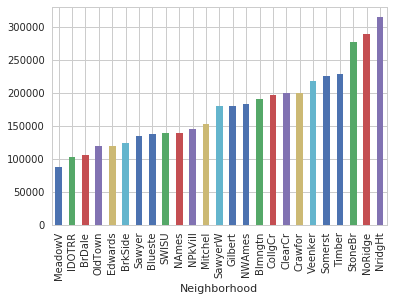

In [40]:
#grouping neighborhood variable based on this plot
train['SalePrice'].groupby(train['Neighborhood']).median().sort_values().plot(kind='bar')

The graph above gives us a good hint on <strong>how to combine levels of the neighborhood variable into fewer levels.</strong> We can combine bars of somewhat equal height in one category. To do this, we'll simply create a dictionary and map it with variable values.

In [41]:
neighborhood_map = {"MeadowV" : 0, "IDOTRR" : 1, "BrDale" : 1, "OldTown" : 1, "Edwards" : 1, "BrkSide" : 1, "Sawyer" : 1, "Blueste" : 1, "SWISU" : 2, "NAmes" : 2, "NPkVill" : 2, "Mitchel" : 2, "SawyerW" : 2, "Gilbert" : 2, "NWAmes" : 2, "Blmngtn" : 2, "CollgCr" : 2, "ClearCr" : 3, "Crawfor" : 3, "Veenker" : 3, "Somerst" : 3, "Timber" : 3, "StoneBr" : 4, "NoRidge" : 4, "NridgHt" : 4}

alldata['NeighborhoodBin'] = alldata2['Neighborhood'].map(neighborhood_map)
alldata.loc[alldata2.Neighborhood == 'NridgHt', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Crawfor', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'StoneBr', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Somerst', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'NoRidge', "Neighborhood_Good"] = 1
alldata["Neighborhood_Good"].fillna(0, inplace=True)
alldata["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

# House completed before sale or not
alldata["BoughtOffPlan"] = alldata2.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
alldata["BadHeating"] = alldata2.HeatingQC.replace({'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})
alldata.shape

(2915, 126)

<strong>Until this point, we've added 43 new features in the data set. Now, let's split the data into test and train and create some more features.</strong>

In [42]:
#create new data
train_new = alldata[alldata['SalePrice'].notnull()]
test_new = alldata[alldata['SalePrice'].isnull()]

print (train.shape, train_new.shape)
print ('----------------')
print (test.shape, test_new.shape)

(1456, 81) (1456, 126)
----------------
(1459, 80) (1459, 126)


#### Now, we'll transform numeric features and remove their skewness.

In [43]:
#get numeric features
numeric_features = [f for f in train_new.columns if train_new[f].dtype != object]

#transform the numeric features using log(x + 1)
from scipy.stats import skew
skewed = train_new[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
train_new[skewed] = np.log1p(train_new[skewed])
test_new[skewed] = np.log1p(test_new[skewed])
del test_new['SalePrice']

/home/fractaluser/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


<strong>Now, we'll standardize the numeric features.</strong>

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_new[numeric_features])
scaled = scaler.transform(train_new[numeric_features])

for i, col in enumerate(numeric_features):
       train_new[col] = scaled[:,i]

numeric_features.remove('SalePrice')
scaled = scaler.fit_transform(test_new[numeric_features])

for i, col in enumerate(numeric_features):
      test_new[col] = scaled[:,i]

/home/fractaluser/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/fractaluser/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


<strong>Now, we'll one-hot encode the categorical variable. In one-hot encoding, every level of a categorical variable results in a new variable with binary values (0 or 1).</strong>

In [45]:
def onehot(onehot_df, df, column_name, fill_na):
       onehot_df[column_name] = df[column_name]
       if fill_na is not None:
            onehot_df[column_name].fillna(fill_na, inplace=True)

       dummies = pd.get_dummies(onehot_df[column_name], prefix="_"+column_name)
       onehot_df = onehot_df.join(dummies)
       onehot_df = onehot_df.drop([column_name], axis=1)
       return onehot_df

def munge_onehot(df):
       onehot_df = pd.DataFrame(index = df.index)

       onehot_df = onehot(onehot_df, df, "MSSubClass", None)
       onehot_df = onehot(onehot_df, df, "MSZoning", "RL")
       onehot_df = onehot(onehot_df, df, "LotConfig", None)
       onehot_df = onehot(onehot_df, df, "Neighborhood", None)
       onehot_df = onehot(onehot_df, df, "Condition1", None)
       onehot_df = onehot(onehot_df, df, "BldgType", None)
       onehot_df = onehot(onehot_df, df, "HouseStyle", None)
       onehot_df = onehot(onehot_df, df, "RoofStyle", None)
       onehot_df = onehot(onehot_df, df, "Exterior1st", "VinylSd")
       onehot_df = onehot(onehot_df, df, "Exterior2nd", "VinylSd")
       onehot_df = onehot(onehot_df, df, "Foundation", None)
       onehot_df = onehot(onehot_df, df, "SaleType", "WD")
       onehot_df = onehot(onehot_df, df, "SaleCondition", "Normal")

       #Fill in missing MasVnrType for rows that do have a MasVnrArea.
       temp_df = df[["MasVnrType", "MasVnrArea"]].copy()
       idx = (df["MasVnrArea"] != 0) & ((df["MasVnrType"] == "None") | (df["MasVnrType"].isnull()))
       temp_df.loc[idx, "MasVnrType"] = "BrkFace"
       onehot_df = onehot(onehot_df, temp_df, "MasVnrType", "None")

       onehot_df = onehot(onehot_df, df, "LotShape", None)
       onehot_df = onehot(onehot_df, df, "LandContour", None)
       onehot_df = onehot(onehot_df, df, "LandSlope", None)
       onehot_df = onehot(onehot_df, df, "Electrical", "SBrkr")
       onehot_df = onehot(onehot_df, df, "GarageType", "None")
       onehot_df = onehot(onehot_df, df, "PavedDrive", None)
       onehot_df = onehot(onehot_df, df, "MiscFeature", "None")
       onehot_df = onehot(onehot_df, df, "Street", None)
       onehot_df = onehot(onehot_df, df, "Alley", "None")
       onehot_df = onehot(onehot_df, df, "Condition2", None)
       onehot_df = onehot(onehot_df, df, "RoofMatl", None)
       onehot_df = onehot(onehot_df, df, "Heating", None)

       # we'll have these as numerical variables too
       onehot_df = onehot(onehot_df, df, "ExterQual", "None")
       onehot_df = onehot(onehot_df, df, "ExterCond", "None")
       onehot_df = onehot(onehot_df, df, "BsmtQual", "None")
       onehot_df = onehot(onehot_df, df, "BsmtCond", "None")
       onehot_df = onehot(onehot_df, df, "HeatingQC", "None")
       onehot_df = onehot(onehot_df, df, "KitchenQual", "TA")
       onehot_df = onehot(onehot_df, df, "FireplaceQu", "None")
       onehot_df = onehot(onehot_df, df, "GarageQual", "None")
       onehot_df = onehot(onehot_df, df, "GarageCond", "None")
       onehot_df = onehot(onehot_df, df, "PoolQC", "None")
       onehot_df = onehot(onehot_df, df, "BsmtExposure", "None")
       onehot_df = onehot(onehot_df, df, "BsmtFinType1", "None")
       onehot_df = onehot(onehot_df, df, "BsmtFinType2", "None")
       onehot_df = onehot(onehot_df, df, "Functional", "Typ")
       onehot_df = onehot(onehot_df, df, "GarageFinish", "None")
       onehot_df = onehot(onehot_df, df, "Fence", "None")
       onehot_df = onehot(onehot_df, df, "MoSold", None)

       # Divide  the years between 1871 and 2010 into slices of 20 years
       year_map = pd.concat(pd.Series("YearBin" + str(i+1), index=range(1871+i*20,1891+i*20))  for i in range(0, 7))
       yearbin_df = pd.DataFrame(index = df.index)
       yearbin_df["GarageYrBltBin"] = df.GarageYrBlt.map(year_map)
       yearbin_df["GarageYrBltBin"].fillna("NoGarage", inplace=True)
       yearbin_df["YearBuiltBin"] = df.YearBuilt.map(year_map)
       yearbin_df["YearRemodAddBin"] = df.YearRemodAdd.map(year_map)

       onehot_df = onehot(onehot_df, yearbin_df, "GarageYrBltBin", None)
       onehot_df = onehot(onehot_df, yearbin_df, "YearBuiltBin", None)
       onehot_df = onehot(onehot_df, yearbin_df, "YearRemodAddBin", None)
       return onehot_df

#create one-hot features
onehot_df = munge_onehot(train)

neighborhood_train = pd.DataFrame(index=train_new.shape)
neighborhood_train['NeighborhoodBin'] = train_new['NeighborhoodBin']
neighborhood_test = pd.DataFrame(index=test_new.shape)
neighborhood_test['NeighborhoodBin'] = test_new['NeighborhoodBin']

onehot_df = onehot(onehot_df, neighborhood_train, 'NeighborhoodBin', None)

In [46]:
# Let's add the one-hot variables in our train data set.
train_new = train_new.join(onehot_df)

<strong>Woah! This resulted in a whopping 433 columns. Similarly, we will add one-hot variables in test data as well.</strong>

In [47]:
# adding one hot features to test
onehot_df_te = munge_onehot(test)
onehot_df_te = onehot(onehot_df_te, neighborhood_test, "NeighborhoodBin", None)
test_new = test_new.join(onehot_df_te)
test_new.shape

(1459, 417)

In [71]:
test_new.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,...,_BsmtFinType2_None,_BsmtFinType2_Rec,_BsmtFinType2_Unf,_Functional_Maj1,_Functional_Maj2,_Functional_Min1,_Functional_Min2,_Functional_Mod,_Functional_Sev,_Functional_Typ,_GarageFinish_Fin,_GarageFinish_None,_GarageFinish_RFn,_GarageFinish_Unf,_Fence_GdPrv,_Fence_GdWo,_Fence_MnPrv,_Fence_MnWw,_Fence_None,_MoSold_1,_MoSold_2,_MoSold_3,_MoSold_4,_MoSold_5,_MoSold_6,_MoSold_7,_MoSold_8,_MoSold_9,_MoSold_10,_MoSold_11,_MoSold_12,_GarageYrBltBin_NoGarage,_GarageYrBltBin_YearBin2,_GarageYrBltBin_YearBin3,_GarageYrBltBin_YearBin4,_GarageYrBltBin_YearBin5,_GarageYrBltBin_YearBin6,_GarageYrBltBin_YearBin7,_YearBuiltBin_YearBin1,_YearBuiltBin_YearBin2,_YearBuiltBin_YearBin3,_YearBuiltBin_YearBin4,_YearBuiltBin_YearBin5,_YearBuiltBin_YearBin6,_YearBuiltBin_YearBin7,_YearRemodAddBin_YearBin4,_YearRemodAddBin_YearBin5,_YearRemodAddBin_YearBin6,_YearRemodAddBin_YearBin7,_NeighborhoodBin_-1.0875767879360991
0,-0.612887,-0.857154,-0.094573,NaN,-1.029543,-0.444745,0.164335,-0.53213,0.063936,2.234418,-0.253481,1.041499,-0.818068,-0.259952,-0.499340,0.000040,0.272716,-1.429972,Norm,SBrkr,-0.450468,-0.183916,-0.667169,0.764337,0.749936,2.015568,-0.950143,-0.898055,-0.533007,-1.028720,0.231233,1.185511,-0.984704,0.269701,-0.795814,0.292684,Attchd,1961,-1.442112,-0.751040,GasA,-1.211189,-0.530207,-1.730864,-0.193289,-0.761697,Lvl,Gtl,0.561787,0.572445,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0.588954,-0.857154,-0.094573,NaN,0.175997,-0.444745,0.164335,-0.53213,1.063714,-0.369720,0.689960,-0.254698,-0.818068,-0.259952,-0.499340,0.215875,0.272716,0.070745,Norm,SBrkr,-0.450468,-0.183916,-0.667169,1.039484,1.030776,-0.493490,-0.950143,-0.898055,-0.533007,-1.028720,0.231233,-0.738518,-0.984704,0.269701,-0.795814,0.292684,Attchd,1958,-0.194908,1.237648,GasA,-1.211189,-0.530207,-1.728490,-0.193289,0.738055,Lvl,Gtl,0.970407,-1.950811,...,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,-0.505930,1.153084,-0.094573,NaN,0.175997,-0.444745,0.164335,-0.53213,0.773668,-0.369720,1.161680,-0.254698,-0.818068,-0.259952,0.572038,-0.358115,0.272716,0.070745,Norm,SBrkr,-0.450468,-0.183916,-0.667169,0.764337,0.749936,2.015568,0.716033,0.647066,0.833702,0.773083,0.231233,0.043982,0.302646,0.269701,1.424248,0.292684,Attchd,1997,0.449155,1.237648,GasA,-0.165553,1.036785,-1.726115,-0.193289,-0.761697,Lvl,Gtl,0.908413,0.572445,...,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,-0.512506,1.142867,-0.094573,NaN,0.175997,-0.444745,0.164335,-0.53213,0.358376,-0.369720,1.161680,-0.254698,-0.818068,-0.259952,-0.499340,0.096473,0.272716,0.070745,Norm,SBrkr,-0.450468,-0.183916,-0.667169,0.764337,0.749936,-0.493490,1.271426,0.647066,0.833702,0.773083,0.231233,-0.011253,0.302646,0.269701,1.424248,0.292684,Attchd,1998,0.400213,1.237648,GasA,0.880083,1.036785,-1.723741,-0.193289,0.738055,Lvl,Gtl,0.257857,0.572445,...,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
4,0.474414,-0.857154,-0.094573,NaN,-1.029543,2.631824,0.164335,-0.53213,-0.386513,-0.369720,0.689960,-0.254698,-0.818068,-0.259952,0.572038,0.702417,0.272716,0.070745,Norm,SBrkr,-0.450468,-0.183916,1.059131,-1.161687,-1.215950,-0.493490,-0.950143,-0.898055,0.833702,0.773083,0.231233,0.154452,0.302646,0.269701,0.314217,0.292684,Attchd,1992,-0.313771,-0.751040,GasA,0.880083,-0.53020

<strong>The difference in number of train and test columns suggests that some new features in the train data aren't available in the test data. Let's remove those variables and keep an equal number of columns in the train and test data.<strong>

In [48]:
#dropping some columns from the train data as they are not found in test
drop_cols = ["_Exterior1st_ImStucc", "_Exterior1st_Stone","_Exterior2nd_Other","_HouseStyle_2.5Fin","_RoofMatl_Membran", "_RoofMatl_Metal", "_RoofMatl_Roll", "_Condition2_RRAe", "_Condition2_RRAn", "_Condition2_RRNn", "_Heating_Floor", "_Heating_OthW", "_Electrical_Mix", "_MiscFeature_TenC", "_GarageQual_Ex",  "_PoolQC_Fa"]
train_new.drop(drop_cols, axis=1, inplace=True)

<strong>Here, we'll remove a few more columns which either have lots of zeroes (hence doesn't provide any real information) or aren't available in either of the data sets.</strong>

In [49]:
 #removing one column missing from train data
test_new.drop(["_MSSubClass_150"], axis=1, inplace=True)

# Drop these columns
drop_cols = ["_Condition2_PosN", # only two are not zero
         "_MSZoning_C (all)",
         "_MSSubClass_160"]

train_new.drop(drop_cols, axis=1, inplace=True)
test_new.drop(drop_cols, axis=1, inplace=True)


In [50]:
#create a label set
label_df = pd.DataFrame(index = train_new.index, columns = ['SalePrice'])
label_df['SalePrice'] = np.log(train['SalePrice'])
print("Training set size:", train_new.shape)
print("Test set size:", test_new.shape)

Training set size: (1456, 414)
Test set size: (1459, 413)


In [89]:
label_df.head()

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


## Model Training and Evaluation
Since our data is ready, we'll start training models now. We'll use three algorithms: XGBoost, Neural Network and Lasso Regression. Finally, we'll ensemble the models to generate final predictions.

In [91]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
train_n = train_new
train_n.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,...,_BsmtFinType2_None,_BsmtFinType2_Rec,_BsmtFinType2_Unf,_Functional_Maj1,_Functional_Maj2,_Functional_Min1,_Functional_Min2,_Functional_Mod,_Functional_Sev,_Functional_Typ,_GarageFinish_Fin,_GarageFinish_None,_GarageFinish_RFn,_GarageFinish_Unf,_Fence_GdPrv,_Fence_GdWo,_Fence_MnPrv,_Fence_MnWw,_Fence_None,_MoSold_1,_MoSold_2,_MoSold_3,_MoSold_4,_MoSold_5,_MoSold_6,_MoSold_7,_MoSold_8,_MoSold_9,_MoSold_10,_MoSold_11,_MoSold_12,_GarageYrBltBin_NoGarage,_GarageYrBltBin_YearBin2,_GarageYrBltBin_YearBin3,_GarageYrBltBin_YearBin4,_GarageYrBltBin_YearBin5,_GarageYrBltBin_YearBin6,_GarageYrBltBin_YearBin7,_YearBuiltBin_YearBin1,_YearBuiltBin_YearBin2,_YearBuiltBin_YearBin3,_YearBuiltBin_YearBin4,_YearBuiltBin_YearBin5,_YearBuiltBin_YearBin6,_YearBuiltBin_YearBin7,_YearRemodAddBin_YearBin4,_YearRemodAddBin_YearBin5,_YearRemodAddBin_YearBin6,_YearRemodAddBin_YearBin7,_NeighborhoodBin_-0.04760808471778121
0,-0.805990,1.185669,-0.128701,NaN,0.165909,-0.429953,0.118048,-0.550244,0.625446,-0.355892,1.168490,-0.237653,1.114055,-0.241689,0.589513,-0.339062,0.2642,0.092451,Norm,SBrkr,-0.404890,-0.206241,1.099431,0.762298,0.749653,-0.480815,-1.005862,-0.951673,0.837550,0.800349,0.237387,0.360672,0.315804,0.266008,0.322905,0.262927,Attchd,2003,0.548227,1.231823,GasA,0.893378,1.029590,-1.729139,-0.207905,0.746315,Lvl,Gtl,-0.127817,0.602654,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,0.433256,-0.867410,-0.128701,NaN,0.165909,-0.429953,0.118048,1.960243,1.257846,-0.355892,0.693658,-0.237653,-0.819275,4.040898,0.589513,0.003303,0.2642,-1.400203,Norm,SBrkr,-0.404890,-0.206241,-0.683139,-0.614415,-0.663468,-0.480815,0.652728,0.610487,-0.546641,0.800349,0.237387,-0.054591,0.315804,0.266008,0.322905,0.262927,Attchd,1976,-0.378408,-0.758781,GasA,0.893378,-0.540679,-1.726767,-0.207905,-0.769215,Lvl,Gtl,0.120797,-0.633211,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,-0.575842,1.189908,-0.128701,NaN,0.165909,-0.429953,0.118048,0.560664,0.113946,-0.355892,1.168490,-0.237653,1.114055,-0.241689,0.589513,0.231214,0.2642,0.092451,Norm,SBrkr,-0.404890,-0.206241,1.099431,0.762298,0.749653,-0.480815,0.652728,0.610487,0.837550,0.800349,0.237387,0.643806,0.315804,0.266008,0.322905,0.262927,Attchd,2001,0.680880,1.231823,GasA,0.893378,1.029590,-1.724395,-0.207905,0.746315,Lvl,Gtl,0.429834,0.602654,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,-0.436663,1.148647,-0.128701,NaN,0.165909,-0.429953,1.927294,-0.550244,-0.513805,-0.355892,0.693658,-0.237653,1.114055,-0.241689,-0.554928,0.348751,0.2642,0.092451,Norm,SBrkr,2.840004,-0.206241,-0.683139,1.037641,1.314901,-0.480815,1.205592,0.610487,-1.930833,-1.026153,0.237387,0.804249,1.656362,0.266008,-0.799171,0.262927,Detchd,1998,0.560689,-0.758781,GasA,-0.148896,1.029590,-1.722023,-0.207905,0.746315,Lvl,Gtl,0.110623,-1.869076,...,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
4,0.122612,1.249303,-0.128701,NaN,1.392121,-0.429953,0.118048,1.348866,0.506871,-0.355892,1.168490,-0.237653,1.114055,-0.241689,0.589513,0.296484,0.2642,0.092451,Norm,SBrkr,-0.404890,-0.206241,1.099431,0.762298,0.749653,-0.480815,0.652728,0.610487,0.837550,0.800349,0.237387,1.719716,1.656362,0.266008,0.322905,0.262927,Attchd,2000,1.314119,1.231823,GasA,0.893378,1.029590,-1.719651,-0.207905,0.746315,

In [100]:
# train_n = train_n.drop(['Alley','Condition2','Electrical','GarageType','GarageYrBlt','Heating','LandContour','LandSlope','LotShape','MiscFeature','PavedDrive','RoofMatl','Street','Utilities'], axis=1)
# test_n = test_new.drop(['Alley','Condition2','Electrical','GarageType','GarageYrBlt','Heating','LandContour','LandSlope','LotShape','MiscFeature','PavedDrive','RoofMatl','Street','Utilities'], axis=1)
# train_n = train_n.drop(['SalePrice'],axis=1)
train_n.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GrLivArea,HalfBath,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LotArea,LotConfig,LotFrontage,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,...,_BsmtFinType2_None,_BsmtFinType2_Rec,_BsmtFinType2_Unf,_Functional_Maj1,_Functional_Maj2,_Functional_Min1,_Functional_Min2,_Functional_Mod,_Functional_Sev,_Functional_Typ,_GarageFinish_Fin,_GarageFinish_None,_GarageFinish_RFn,_GarageFinish_Unf,_Fence_GdPrv,_Fence_GdWo,_Fence_MnPrv,_Fence_MnWw,_Fence_None,_MoSold_1,_MoSold_2,_MoSold_3,_MoSold_4,_MoSold_5,_MoSold_6,_MoSold_7,_MoSold_8,_MoSold_9,_MoSold_10,_MoSold_11,_MoSold_12,_GarageYrBltBin_NoGarage,_GarageYrBltBin_YearBin2,_GarageYrBltBin_YearBin3,_GarageYrBltBin_YearBin4,_GarageYrBltBin_YearBin5,_GarageYrBltBin_YearBin6,_GarageYrBltBin_YearBin7,_YearBuiltBin_YearBin1,_YearBuiltBin_YearBin2,_YearBuiltBin_YearBin3,_YearBuiltBin_YearBin4,_YearBuiltBin_YearBin5,_YearBuiltBin_YearBin6,_YearBuiltBin_YearBin7,_YearRemodAddBin_YearBin4,_YearRemodAddBin_YearBin5,_YearRemodAddBin_YearBin6,_YearRemodAddBin_YearBin7,_NeighborhoodBin_-0.04760808471778121
0,-0.805990,1.185669,-0.128701,0.165909,-0.429953,0.118048,-0.550244,0.625446,-0.355892,1.168490,-0.237653,1.114055,-0.241689,0.589513,-0.339062,0.2642,0.092451,-0.404890,-0.206241,1.099431,0.762298,0.749653,-0.480815,-1.005862,-0.951673,0.837550,0.800349,0.237387,0.360672,0.315804,0.266008,0.322905,0.262927,0.548227,1.231823,0.893378,1.029590,-1.729139,-0.207905,0.746315,-0.127817,0.602654,-0.076848,-0.133789,0.569326,-0.045595,1.209296,-1.241753,-0.190752,-1.603837,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,0.433256,-0.867410,-0.128701,0.165909,-0.429953,0.118048,1.960243,1.257846,-0.355892,0.693658,-0.237653,-0.819275,4.040898,0.589513,0.003303,0.2642,-1.400203,-0.404890,-0.206241,-0.683139,-0.614415,-0.663468,-0.480815,0.652728,0.610487,-0.546641,0.800349,0.237387,-0.054591,0.315804,0.266008,0.322905,0.262927,-0.378408,-0.758781,0.893378,-0.540679,-1.726767,-0.207905,-0.769215,0.120797,-0.633211,0.562906,-0.133789,-1.201571,-0.045595,-0.805439,0.390009,-0.190752,-0.491667,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,-0.575842,1.189908,-0.128701,0.165909,-0.429953,0.118048,0.560664,0.113946,-0.355892,1.168490,-0.237653,1.114055,-0.241689,0.589513,0.231214,0.2642,0.092451,-0.404890,-0.206241,1.099431,0.762298,0.749653,-0.480815,0.652728,0.610487,0.837550,0.800349,0.237387,0.643806,0.315804,0.266008,0.322905,0.262927,0.680880,1.231823,0.893378,1.029590,-1.724395,-0.207905,0.746315,0.429834,0.602654,0.062014,-0.133789,0.569326,-0.045595,1.137048,-1.241753,-0.190752,0.991227,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,-0.436663,1.148647,-0.128701,0.165909,-0.429953,1.927294,-0.550244,-0.513805,-0.355892,0.693658,-0.237653,1.114055,-0.241689,-0.554928,0.348751,0.2642,0.092451,2.840004,-0.206241,-0.683139,1.037641,1.314901,-0.480815,1.205592,0.610487,-1.930833,-1.026153,0.237387,0.804249,1.656362,0.266008,-0.799171,0.262927,0.560689,-0.758781,-0.148896,1.029590,-1.722023,-0.207905,0.746315,0.110623,-1.869076,-0.322950,-0.133789,0.721681,-0.045595,-0.805439,0.390009,-0.190752,-1.603837,...,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
4,0.122612,1.249303,-0.128701,1.392121,-0.429953,0.118048,1.348866,0.506871,-0.355892,1.168490,-0.237653,1.114055,-0.241689,0.589513,0.296484,0.2642,0.092451,-0.404890,-0.206241,1.099431,0.762298,0.749653,-0.480815,0.652728,0.610487,0.837550,0.800349,

In [108]:
print(train_n.shape,"\n")
print(test_n.shape,"\n")

(1456, 399) 

(1459, 399) 



In [101]:
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)

regr.fit(train_n, label_df)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.0, learning_rate=0.05,
       max_delta_step=0, max_depth=6, min_child_weight=1.5, missing=None,
       n_estimators=7200, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1,
       seed=42, silent=1, subsample=0.2)

### Hyper-parameter tuning
These parameters’ values are derived using cross-validation. To evaluate the model's performance, we'll create a quick RMSE function.

In [95]:
test_n.columns = test_n.columns.str.replace('_NeighborhoodBin_-1.0875767879360991','_NeighborhoodBin_-0.04760808471778121')
list(test_n)

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GrLivArea',
 'HalfBath',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'KitchenQual',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'PoolQC',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold',
 'IsRegularLotShape',
 'IsLand

In [102]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

# run prediction on training set to get an idea of how well it does
y_pred = regr.predict(train_n)
y_test = label_df
print("XGBoost score on training set: ", rmse(y_test, y_pred))
# XGBoost score on training set: ', 0.037633322832013358)

# make prediction on test set
y_pred_xgb = regr.predict(test_n)

#submit this prediction and get the score
pred1 = pd.DataFrame({'Id': test['Id'], 'SalePrice': np.exp(y_pred_xgb)})
pred1.to_csv('xgbnono.csv', header=True, index=False)

XGBoost score on training set:  0.037705757169330764


<strong>Submitting this file on kaggle platform and check our RMSE score. </strong>We get 0.12389 on leaderboard. This puts us in the top 28% of the participants. Next, let's train the lasso model.

In [103]:
from sklearn.linear_model import Lasso

#found this best alpha through cross-validation
best_alpha = 0.00099

regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(train_n, label_df)

# run prediction on the training set to get a rough idea of how well it does
y_pred = regr.predict(train_n)
y_test = label_df
print("Lasso score on training set: ", rmse(y_test, y_pred))
# <pre class="">('Lasso score on training set: ', 0.10175440647797629)</pre>

Lasso score on training set:  0.10175440647797629


In [104]:
#make prediction on the test set
y_pred_lasso = regr.predict(test_n)
lasso_ex = np.exp(y_pred_lasso)
pred1 = pd.DataFrame({'Id': test['Id'], 'SalePrice': lasso_ex})
pred1.to_csv('lasso_model.csv', header=True, index=False)

Uploading this file on Kaggle and check the score. We scored 0.11859 on the leaderboard. We see that <u>the lasso model has outperformed the formidable XGBoost algorithm. </u>And, it also improved our rank. With this, we have advanced into the top 16% of the participants. Since the data set is high dimensional (means large number of features), we can try our hands at building a neural network model as well. Let's do it. We'll use the keras library to train the neural network.

In [113]:
train_n = train_new.drop(['Alley','Condition2','Electrical','GarageType','GarageYrBlt','Heating','LandContour','LandSlope','LotShape','MiscFeature','PavedDrive','RoofMatl','Street','Utilities'], axis=1)
# test_n = test_new.drop(['Alley','Condition2','Electrical','GarageType','GarageYrBlt','Heating','LandContour','LandSlope','LotShape','MiscFeature','PavedDrive','RoofMatl','Street','Utilities'], axis=1)
train_n = train_n.drop(['SalePrice'],axis=1)
train_n.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GrLivArea,HalfBath,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LotArea,LotConfig,LotFrontage,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,...,_BsmtFinType2_None,_BsmtFinType2_Rec,_BsmtFinType2_Unf,_Functional_Maj1,_Functional_Maj2,_Functional_Min1,_Functional_Min2,_Functional_Mod,_Functional_Sev,_Functional_Typ,_GarageFinish_Fin,_GarageFinish_None,_GarageFinish_RFn,_GarageFinish_Unf,_Fence_GdPrv,_Fence_GdWo,_Fence_MnPrv,_Fence_MnWw,_Fence_None,_MoSold_1,_MoSold_2,_MoSold_3,_MoSold_4,_MoSold_5,_MoSold_6,_MoSold_7,_MoSold_8,_MoSold_9,_MoSold_10,_MoSold_11,_MoSold_12,_GarageYrBltBin_NoGarage,_GarageYrBltBin_YearBin2,_GarageYrBltBin_YearBin3,_GarageYrBltBin_YearBin4,_GarageYrBltBin_YearBin5,_GarageYrBltBin_YearBin6,_GarageYrBltBin_YearBin7,_YearBuiltBin_YearBin1,_YearBuiltBin_YearBin2,_YearBuiltBin_YearBin3,_YearBuiltBin_YearBin4,_YearBuiltBin_YearBin5,_YearBuiltBin_YearBin6,_YearBuiltBin_YearBin7,_YearRemodAddBin_YearBin4,_YearRemodAddBin_YearBin5,_YearRemodAddBin_YearBin6,_YearRemodAddBin_YearBin7,_NeighborhoodBin_-0.04760808471778121
0,-0.805990,1.185669,-0.128701,0.165909,-0.429953,0.118048,-0.550244,0.625446,-0.355892,1.168490,-0.237653,1.114055,-0.241689,0.589513,-0.339062,0.2642,0.092451,-0.404890,-0.206241,1.099431,0.762298,0.749653,-0.480815,-1.005862,-0.951673,0.837550,0.800349,0.237387,0.360672,0.315804,0.266008,0.322905,0.262927,0.548227,1.231823,0.893378,1.029590,-1.729139,-0.207905,0.746315,-0.127817,0.602654,-0.076848,-0.133789,0.569326,-0.045595,1.209296,-1.241753,-0.190752,-1.603837,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,0.433256,-0.867410,-0.128701,0.165909,-0.429953,0.118048,1.960243,1.257846,-0.355892,0.693658,-0.237653,-0.819275,4.040898,0.589513,0.003303,0.2642,-1.400203,-0.404890,-0.206241,-0.683139,-0.614415,-0.663468,-0.480815,0.652728,0.610487,-0.546641,0.800349,0.237387,-0.054591,0.315804,0.266008,0.322905,0.262927,-0.378408,-0.758781,0.893378,-0.540679,-1.726767,-0.207905,-0.769215,0.120797,-0.633211,0.562906,-0.133789,-1.201571,-0.045595,-0.805439,0.390009,-0.190752,-0.491667,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,-0.575842,1.189908,-0.128701,0.165909,-0.429953,0.118048,0.560664,0.113946,-0.355892,1.168490,-0.237653,1.114055,-0.241689,0.589513,0.231214,0.2642,0.092451,-0.404890,-0.206241,1.099431,0.762298,0.749653,-0.480815,0.652728,0.610487,0.837550,0.800349,0.237387,0.643806,0.315804,0.266008,0.322905,0.262927,0.680880,1.231823,0.893378,1.029590,-1.724395,-0.207905,0.746315,0.429834,0.602654,0.062014,-0.133789,0.569326,-0.045595,1.137048,-1.241753,-0.190752,0.991227,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,-0.436663,1.148647,-0.128701,0.165909,-0.429953,1.927294,-0.550244,-0.513805,-0.355892,0.693658,-0.237653,1.114055,-0.241689,-0.554928,0.348751,0.2642,0.092451,2.840004,-0.206241,-0.683139,1.037641,1.314901,-0.480815,1.205592,0.610487,-1.930833,-1.026153,0.237387,0.804249,1.656362,0.266008,-0.799171,0.262927,0.560689,-0.758781,-0.148896,1.029590,-1.722023,-0.207905,0.746315,0.110623,-1.869076,-0.322950,-0.133789,0.721681,-0.045595,-0.805439,0.390009,-0.190752,-1.603837,...,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
4,0.122612,1.249303,-0.128701,1.392121,-0.429953,0.118048,1.348866,0.506871,-0.355892,1.168490,-0.237653,1.114055,-0.241689,0.589513,0.296484,0.2642,0.092451,-0.404890,-0.206241,1.099431,0.762298,0.749653,-0.480815,0.652728,0.610487,0.837550,0.800349,

In [142]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler

np.random.seed(10)

def root_mean_squared_error(y_test, kpred):
    return K.sqrt(K.mean(K.square(kpred - y_true), axis=-1))

#create Model
#define base model
def base_model():
     model = Sequential()
     model.add(Dense(20, input_dim=399, init='normal', activation='relu'))
     model.add(Dense(10, init='normal', activation='relu'))
     model.add(Dense(1, init='normal'))
     model.compile(loss='mean_squared_error', optimizer = 'adam', metrics= ["accuracy"])
     return model

seed = 7
np.random.seed(seed)

scale = StandardScaler()
X_train = scale.fit_transform(train_n)
X_test = scale.fit_transform(test_n)

keras_label = label_df.as_matrix()
clf = KerasRegressor(build_fn=base_model, nb_epoch=1000, batch_size=5,verbose=0)
clf.fit(X_train,keras_label)

#make predictions and create the submission file 
k_pred = clf.predict(X_test) 
kpred = np.exp(k_pred)
pred_df = pd.DataFrame(kpred, index=test["Id"], columns=["SalePrice"]) 
pred_df.to_csv('keras1.csv', header=True, index_label='Id')

/home/fractaluser/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, kernel_initializer="normal", activation="relu", input_dim=399)`
  from ipykernel import kernelapp as app
/home/fractaluser/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="normal", activation="relu")`
  app.launch_new_instance()
/home/fractaluser/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`


Submit this file and check our score. <strong>We get RMSE as 1.35346 / (my _ 2.44667), which is worse than the previous two models. </strong>We drop this model here. For further improvement, let's try to ensemble the predictions from XGBoost and lasso model. We'll simply average the predictions.

In [146]:
#simple average
y_pred = (y_pred_xgb + y_pred_lasso + k_pred ) / 2.38
y_pred = np.exp(y_pred)
y_test = label_df
pred_df = pd.DataFrame(y_pred, index=test["Id"], columns=["SalePrice"])
pred_df.to_csv('ensemble2.csv', header=True, index_label='Id')

In [145]:
#simple average
y_pred = (y_pred_xgb + y_pred_lasso) / 2
y_pred = np.exp(y_pred)
y_test = label_df
pred_df = pd.DataFrame(y_pred, index=test["Id"], columns=["SalePrice"])
pred_df.to_csv('ensemble1.csv', header=True, index_label='Id')

Submit again We get RMSE as 0.11781, which is our best score so far. This puts us in top 14% of the participants. <strong>Often, ensemble technique outperforms the single best model.</strong>